In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score,classification_report,accuracy_score
import pickle
from sklearn.model_selection import RandomizedSearchCV


In [2]:
data=pd.read_csv(r"C:\Users\asdf\Documents\D.S\INEURON-PROJECTS\Tour_Package_Project\data\tour_package.csv")

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Now see the Null values and Handle them

In [4]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
data=data.drop("CustomerID",axis=1)

In [6]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


as we know from eda part we need to handle some feature engineering on the columns which have different values

In [7]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])
data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

In [8]:
y=data["ProdTaken"]
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [9]:
y.shape

(4888,)

In [10]:
x=data.drop("ProdTaken",axis=1)

In [11]:
x.shape

(4888, 18)

In [12]:
column_names=x.columns
column_names

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
x_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2962,39.0,Self Enquiry,3,14.0,Small Business,Female,3,5.0,Deluxe,3.0,Unmarried,2.0,0,2,1,2.0,Manager,22706.0
1788,27.0,Self Enquiry,1,11.0,Salaried,Female,2,3.0,Basic,4.0,Unmarried,2.0,1,3,0,1.0,Executive,17478.0
3499,35.0,Company Invited,1,22.0,Small Business,Male,4,4.0,Super Deluxe,5.0,Married,NaN,0,4,1,3.0,AVP,35685.0
3173,36.0,Self Enquiry,1,32.0,Small Business,Female,3,4.0,Standard,3.0,Married,3.0,1,3,1,2.0,Senior Manager,29066.0
3126,33.0,Company Invited,1,7.0,Salaried,Female,4,5.0,Basic,4.0,Divorced,8.0,0,3,1,1.0,Executive,21010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Unmarried,2.0,0,1,1,2.0,Executive,20723.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0


In [15]:
num_features=x_train.select_dtypes([float,int]).columns
cat_features=x_train.select_dtypes(object).columns

In [16]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [17]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [18]:
num_pipeline=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="mean")),
    ("Scaling",StandardScaler())
])

In [19]:
num_pipeline

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaling', StandardScaler())])

In [20]:
cat_pipeline=Pipeline(steps=[
    ("imputing",SimpleImputer(strategy="most_frequent")),
    ("Encoding",OneHotEncoder())
])

In [21]:
cat_pipeline

Pipeline(steps=[('imputing', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder())])

In [22]:
preprocessor=ColumnTransformer([
    ("num_pipeline",num_pipeline,num_features),
    ("cat_pipeline",cat_pipeline,cat_features)
])

In [23]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder())]),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])

In [24]:
preprocessor=preprocessor.fit(x_train)

In [25]:
with open("Processor.pkl","wb") as f:
    pickle.dump(preprocessor,f)

In [26]:
x_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2962,39.0,Self Enquiry,3,14.0,Small Business,Female,3,5.0,Deluxe,3.0,Unmarried,2.0,0,2,1,2.0,Manager,22706.0
1788,27.0,Self Enquiry,1,11.0,Salaried,Female,2,3.0,Basic,4.0,Unmarried,2.0,1,3,0,1.0,Executive,17478.0
3499,35.0,Company Invited,1,22.0,Small Business,Male,4,4.0,Super Deluxe,5.0,Married,NaN,0,4,1,3.0,AVP,35685.0
3173,36.0,Self Enquiry,1,32.0,Small Business,Female,3,4.0,Standard,3.0,Married,3.0,1,3,1,2.0,Senior Manager,29066.0
3126,33.0,Company Invited,1,7.0,Salaried,Female,4,5.0,Basic,4.0,Divorced,8.0,0,3,1,1.0,Executive,21010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Unmarried,2.0,0,1,1,2.0,Executive,20723.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0


In [27]:
x_train=preprocessor.transform(x_train)
x_train

array([[ 0.16752713,  1.4834196 , -0.17769967, ...,  1.        ,
         0.        ,  0.        ],
       [-1.15621181, -0.70823914, -0.54478249, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27371919, -0.70823914,  0.80118788, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05721555,  1.4834196 ,  1.53535353, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04590023,  1.4834196 ,  1.78007542, ...,  1.        ,
         0.        ,  0.        ],
       [-1.7077697 , -0.70823914, -0.78950438, ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
x_test=preprocessor.transform(x_test)

In [29]:
x_train.shape,x_test.shape

((3274, 33), (1614, 33))

In [30]:
column_names

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [31]:
new_columns=pd.get_dummies(x,columns=cat_features).columns

In [32]:
new_columns

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Basic', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Designation_AVP',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [33]:
pd.DataFrame(x_train,columns=new_columns)

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.167527,1.483420,-0.177700,0.125643,1.282986,-0.731366,-0.678533,-0.637936,-0.776562,0.783328,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.156212,-0.708239,-0.544782,-1.264066,-0.719965,0.523065,-0.678533,1.567556,-0.047645,-1.276604,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.273719,-0.708239,0.801188,1.515352,0.281511,1.777496,0.000000,-0.637936,0.681272,0.783328,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.163408,-0.708239,2.024797,0.125643,0.281511,-0.731366,-0.134543,1.567556,-0.047645,0.783328,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.494342,-0.708239,-1.034226,1.515352,1.282986,0.523065,2.585408,-0.637936,-0.047645,0.783328,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,-1.045900,-0.708239,-0.667143,0.125643,1.282986,-0.731366,-0.678533,-0.637936,-1.505478,0.783328,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3270,0.388150,1.483420,-0.911865,0.125643,-0.719965,1.777496,-1.222523,-0.637936,1.410189,0.783328,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3271,0.057216,1.483420,1.535354,0.125643,0.281511,-0.731366,2.041418,-0.637936,-0.776562,0.783328,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3272,-1.045900,1.483420,1.780075,0.125643,1.282986,-0.731366,-0.134543,-0.637936,-1.505478,0.783328,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
data["ProdTaken"].value_counts()  #it is not the Imbalanced Dataset

ProdTaken
0    3968
1     920
Name: count, dtype: int64

### Define the Models

In [35]:
models={
    "Logistic_Regression":LogisticRegression(),
    "Random_Forest_Classifier":RandomForestClassifier(),
    "Naive_Bayes_Classifier":GaussianNB(),
    "Decision_Tree_Classifier":DecisionTreeClassifier(),
    "Support_Vector_Machine":SVC(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [36]:
list(models)

['Logistic_Regression',
 'Random_Forest_Classifier',
 'Naive_Bayes_Classifier',
 'Decision_Tree_Classifier',
 'Support_Vector_Machine',
 'KNeighborsClassifier']

In [37]:
list(models.values())[0]

LogisticRegression()

In [38]:
def Model_Training(model_dict,x_train_data,y_train_data):
    acc_report={}
    for i in range(len(list(model_dict))):
        model=list(model_dict.values())[i]
        model.fit(x_train_data,y_train_data)
        y_pred_train=model.predict(x_train_data)
        report=classification_report(y_pred_train,y_train_data)
        accuracy=accuracy_score(y_pred_train,y_train_data)
        print(f"Model:{model}")
        print(f"accuracy for training data for {model}: {accuracy}")
        print(report)
        acc_report[model]=accuracy
    return acc_report

In [39]:
report=Model_Training(models,x_train,y_train)

Model:LogisticRegression()
accuracy for training data for LogisticRegression(): 0.8463653023824068
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2992
           1       0.32      0.72      0.45       282

    accuracy                           0.85      3274
   macro avg       0.65      0.79      0.68      3274
weighted avg       0.91      0.85      0.87      3274

Model:RandomForestClassifier()
accuracy for training data for RandomForestClassifier(): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2647
           1       1.00      1.00      1.00       627

    accuracy                           1.00      3274
   macro avg       1.00      1.00      1.00      3274
weighted avg       1.00      1.00      1.00      3274

Model:GaussianNB()
accuracy for training data for GaussianNB(): 0.8152107513744655
              precision    recall  f1-score   support

           0     

In [40]:
report

{LogisticRegression(): 0.8463653023824068,
 RandomForestClassifier(): 1.0,
 GaussianNB(): 0.8152107513744655,
 DecisionTreeClassifier(): 1.0,
 SVC(): 0.8952351863164325,
 KNeighborsClassifier(): 0.9331093463653024}

In [41]:
score_data=pd.DataFrame({
    "Models":list(models),
    "Score":report.values()
})

In [42]:
score_data

,Models,Score
0,Logistic_Regression,0.846365
1,Random_Forest_Classifier,1.000000
2,Naive_Bayes_Classifier,0.815211
3,Decision_Tree_Classifier,1.000000
4,Support_Vector_Machine,0.895235
5,KNeighborsClassifier,0.933109


In [43]:
score_data=score_data.sort_values("Score",ascending=False).reset_index()

In [44]:
score_data

,index,Models,Score
0,1,Random_Forest_Classifier,1.000000
1,3,Decision_Tree_Classifier,1.000000
2,5,KNeighborsClassifier,0.933109
3,4,Support_Vector_Machine,0.895235
4,0,Logistic_Regression,0.846365
5,2,Naive_Bayes_Classifier,0.815211


<Axes: xlabel='Score', ylabel='Models'>

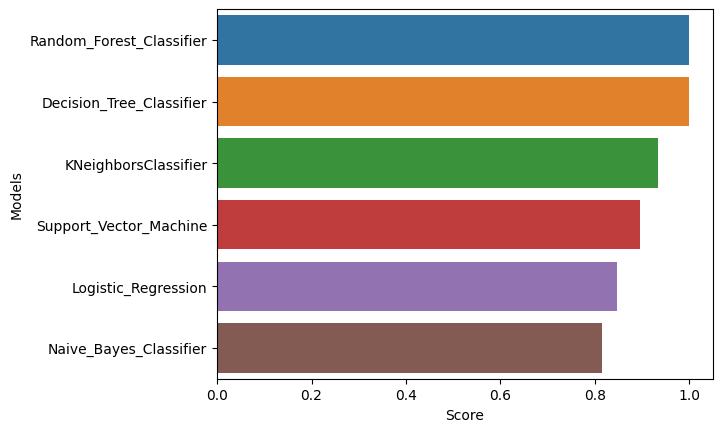

In [45]:
sns.barplot(x=score_data["Score"],y=score_data["Models"])

In [46]:
best_model_name=score_data["Models"][0]

In [47]:
best_model_name

'Random_Forest_Classifier'

In [48]:
Best_Model=models[best_model_name]

In [49]:
Best_Model.score(x_train,y_train)

1.0

In [50]:
Best_Model.score(x_test,y_test)

0.9089219330855018

In [51]:
score_data

,index,Models,Score
0,1,Random_Forest_Classifier,1.000000
1,3,Decision_Tree_Classifier,1.000000
2,5,KNeighborsClassifier,0.933109
3,4,Support_Vector_Machine,0.895235
4,0,Logistic_Regression,0.846365
5,2,Naive_Bayes_Classifier,0.815211


##### Here we can see that there is some overfitting in the model so we need to perform Hyperparametertuning

## HyperparameterTuning

In [52]:
from random import randint
randint(1,9)

7

In [53]:
for i in  range(len(list(models))):
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    param={
        "Random_Forest_Classifier":{
            'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    'max_features':['sqrt','log2'],
                    'n_estimators': [8,16,32,64,128,256] },
        
        "Decision_Tree_Classifier":{
           'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    'splitter':['best','random'],
                    'max_features':['sqrt','log2']},
        
        "KNeighborsClassifier":{'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']},
        
        "Support_Vector_Machine":{
            'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']},
        
        "Logistic_Regression":{},
        
        "Naive_Bayes_Classifier":{}
    }
    
    HT_model=RandomizedSearchCV(model, param[model_name], cv = 5)
    



In [91]:
HT_model

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']})

In [54]:
HT_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']})

In [55]:
HT_model.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [56]:
HT_model.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}

In [57]:
HT_model.best_score_

0.8820995868057988

In [58]:
HT_model.score(x_train,y_train)

1.0

In [59]:
HT_model.score(x_test,y_test)

0.8965303593556382

In [60]:
with open ("Model.pkl","wb") as f:
    pickle.dump(HT_model,f)

In [61]:
with open("Model.pkl","rb") as f:
    model=pickle.load(f)

In [62]:
model.score(x_train,y_train)

1.0

In [63]:
model.score(x_test,y_test)

0.8965303593556382

#### Predicting with New datapoints

In [64]:
data.loc[2938:2938,"Age":]

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2938,35.0,Self Enquiry,3,21.0,Large Business,Female,3,4.0,Basic,3.0,Married,3.0,1,5,1,2.0,Executive,21257.0


In [65]:
new_data_points=np.array(data.loc[2938,"Age":])

In [66]:
new_data_points=new_data_points
new_data_points

array([35.0, 'Self Enquiry', 3, 21.0, 'Large Business', 'Female', 3, 4.0,
       'Basic', 3.0, 'Married', 3.0, 1, 5, 1, 2.0, 'Executive', 21257.0],
      dtype=object)

In [67]:
df_for_model=pd.DataFrame()

In [68]:
df_for_model

""


In [69]:
len(new_data_points)

18

In [70]:
data_columns=x.columns
print(len(data_columns))
data_columns

18


Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [71]:
for i,j in zip(data_columns,new_data_points):
    df_for_model[i]=[j]

In [72]:
df_for_model

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,35.0,Self Enquiry,3,21.0,Large Business,Female,3,4.0,Basic,3.0,Married,3.0,1,5,1,2.0,Executive,21257.0


In [73]:
new_arr=preprocessor.transform(df_for_model)

In [74]:
new_arr

array([[-0.27371919,  1.4834196 ,  0.67882693,  0.1256426 ,  0.28151084,
        -0.73136573, -0.13454257,  1.5675565 ,  1.41018939,  0.783328  ,
         0.94029906, -0.44366701,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

In [75]:
model.predict(new_arr)

array([0], dtype=int64)

In [76]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0


In [77]:
new_points_2=list(x.loc[4887,:])

In [78]:
new_points_2

[36.0,
 'Self Enquiry',
 1,
 14.0,
 'Salaried',
 'Male',
 4,
 4.0,
 'Basic',
 4.0,
 'Unmarried',
 3.0,
 1,
 3,
 1,
 2.0,
 'Executive',
 24041.0]

In [79]:
for i,j in zip(data_columns,new_points_2):
    df_for_model[i]=[j]

In [80]:
df_for_model

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [81]:
new_arr2=preprocessor.transform(df_for_model)

In [82]:
model.predict(new_arr2)

array([1], dtype=int64)

In [83]:
c_model_path=r"C:\Users\asdf\Documents\D.S\INEURON-PROJECTS\Tour_Package_Project\Artifacts\Model.pkl"

In [84]:
with open("Model.pkl","rb") as f:
    c_model=pickle.load(f)

In [85]:
c_model

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']})

In [86]:
c_model.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}

In [87]:
c_model.predict(new_arr2)

array([1], dtype=int64)

In [88]:
len(new_arr2)

1

In [89]:
new_arr2

array([[-0.16340761, -0.70823914, -0.17769967,  1.51535166,  0.28151084,
         0.52306537, -0.13454257,  1.5675565 , -0.04764454,  0.783328  ,
         0.94029906,  0.07824486,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

In [90]:
new_arr2.shape

(1, 33)